# Fiber models - comparison of excitability upon intracellular electrical stimulation

- SD curve myelinated for different diameters
- SD curve unmyelinated for different diameters
- comparison SD curves myelinated vs. unmyelinated for few characteristic diameters
- conclusion about influence of myelination and fiber diameter on excitability 

We analyse the excitability of different fiber types for intracellular electrical stimulation of the central node. To characterize it we use strength-duration curves.

We consider myelinated and unmyelinated fibers with variable diameters. The typical values of the diameters are respectively 5-20 um and 0.2-1.5 um (reference). 

###  Imports

In [1]:
import logging
import matplotlib.pyplot as plt
import numpy as np

from PySONIC.core import PulsedProtocol
#from PySONIC.neurons import getPointNeuron
from PySONIC.utils import logger, si_format
from ExSONIC.core import IintraFiber, IntracellularCurrent, unmyelinatedFiberSundt, myelinatedFiberReilly
from ExSONIC.plt import strengthDurationCurve

##  Intracellular electrical stimulation of a myelinated fiber

To model the myelinated fiber we use the Reilly model, that use the FH (Frankenhaeuser-Huxley) frog myelinated point neuron model. 
We test the fiber for diameters in the range 5-20 um. 

###  Strength-duration curve varying the fiber diameter

In [2]:
#logger.setLevel(logging.WARNING)
fiber = myelinatedFiberReilly(IintraFiber)

# Stimulation parameters: intracellular electrical stimulation
psource = IntracellularCurrent(fiber.nnodes // 2)
toffset = 10e-3  # s
n_dur = 10
durations = np.logspace(-5, 0, n_dur)  # s

n_dia = 3
diameters = np.linspace(0.1e-6, 1e-6, n_dia)

#Initialization of results 
Vthrs_myel = np.zeros((n_dia, n_dur))
Qthrs_myel = np.zeros((n_dia, n_dur))
Vthrs_myel_dic = {}
Qthrs_myel_dic = {}
for i, d in enumerate(diameters):
    
    # Sundt unmyelinated fiber model with diameter d
    fiber = myelinatedFiberReilly(IintraFiber, fiberD = d)
    
    # Compute and plot strength-duration curve for intracellular injection at central node
    Vthrs_myel[i,:] = np.array([fiber.titrate(psource, PulsedProtocol(x, toffset)) 
                               for x in durations]) # A
    Qthrs_myel[i,:] = Vthrs_myel[i,:] * durations  # C
    
    # Result dictionary for the DScurve
    Vthrs_myel_dic[f'unmyel d ={(d*1e6):.2f} um'] = Vthrs_myel[i,:]
    Qthrs_myel_dic[f'unmyel d ={d*1e6} um'] = Qthrs_myel[i,:]

KeyboardInterrupt: 

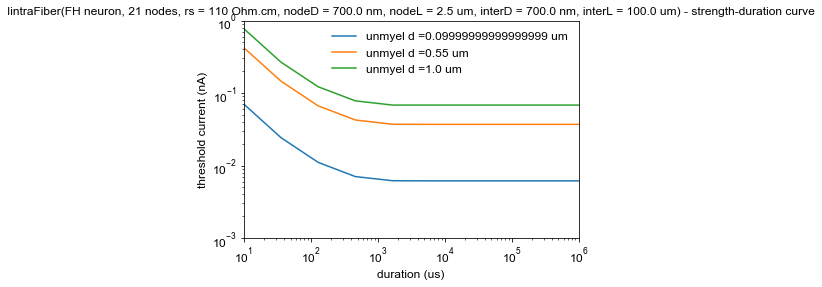

In [8]:
# Plot strength-duration curve
fig2 = strengthDurationCurve(
    fiber, durations, Vthrs_myel_dic, 
    yfactor=1e9, scale='log',  plot_chr=False,)

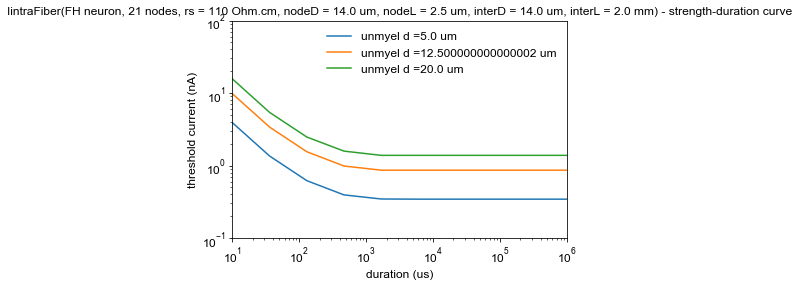

In [6]:
# Plot strength-duration curve
fig2 = strengthDurationCurve(
    fiber, durations, Vthrs_myel_dic, 
    yfactor=1e9, scale='log',  plot_chr=False,)

##  Intracellular electrical stimulation of a unmyelinated fiber

To model the unmyelinated fiber we use the Sundt model. 
We test the fiber for diameters in the range 0.2-1.5 um. 

###  Strength-duration curve varying the fiber diameter

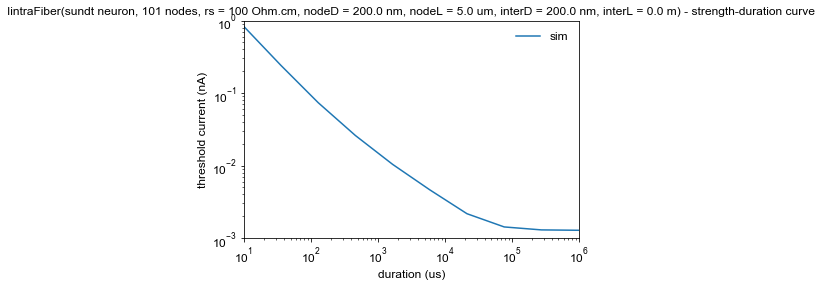

In [2]:
#Test for one SD curve 
logger.setLevel(logging.WARNING)

fiber = unmyelinatedFiberSundt(IintraFiber, fiberD=0.2e-6, fiberL = 5e-4)

# Stimulation parameters: intracellular electrical stimulation
psource = IntracellularCurrent(fiber.nnodes // 2)
toffset = 10e-3  # s
n_dur = 10
durations = np.logspace(-5, 0, n_dur)  # s

Ithrs_sim = np.array([fiber.titrate(psource, PulsedProtocol(x, toffset)) for x in durations]) 
Qthrs_sim = Ithrs_sim * durations  # C

fig2 = strengthDurationCurve(
    fiber, durations, {'sim': Ithrs_sim}, 
    yfactor=1e9, scale='log',  plot_chr=False)

In [4]:
#logger.setLevel(logging.WARNING)


# Stimulation parameters: intracellular electrical stimulation

toffset = 10e-3  # s
n_dur = 10
durations = np.logspace(-5, 0, n_dur)  # s

n_dia = 3
diameters = np.linspace(2e-7, 15e-7, n_dia)

#Initialization of results 
Ithrs_sim = np.zeros((n_dia, n_dur))
Qthrs_sim = np.zeros((n_dia, n_dur))
Ithrs_dic = {}
Qthrs_dic = {}
#logger.setLevel(logging.INFO)
for i, d in enumerate(diameters):
    logger.info(i)
    # Sundt unmyelinated fiber model with diameter d
    fiber = unmyelinatedFiberSundt(IintraFiber, fiberD = d, fiberL = 2.5e-4)
    psource = IntracellularCurrent(fiber.nnodes // 2)
    
    # Compute and plot strength-duration curve for intracellular injection at central node
    Ithrs_sim[i,:] = np.array([fiber.titrate(psource, PulsedProtocol(x, toffset)) 
                               for x in durations]) # A
    Qthrs_sim[i,:] = Ithrs_sim[i,:] * durations  # C
    
    # Result dictionary for the DScurve
    Ithrs_dic[f'unmyel d ={d*1e6} um'] = Ithrs_sim[i,:]
    Qthrs_dic[f'unmyel d ={d*1e6} um'] = Qthrs_sim[i,:]

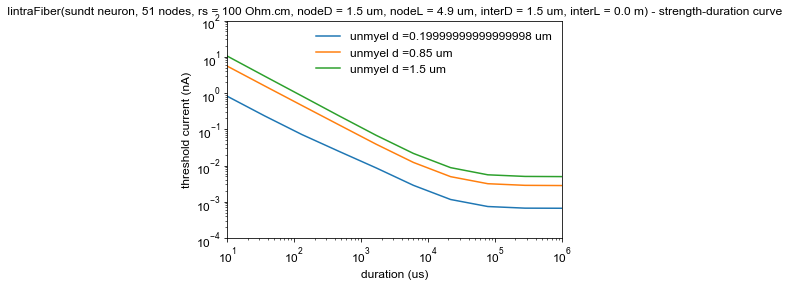

In [5]:
# Plot strength-duration curve

fig2 = strengthDurationCurve(
    fiber, durations, Ithrs_dic, 
    yfactor=1e9, scale='log',  plot_chr=False,)

In [4]:
#logger.setLevel(logging.WARNING)


# Stimulation parameters: intracellular electrical stimulation

toffset = 10e-3  # s
n_dur = 10
durations = np.logspace(-5, 0, n_dur)  # s

n_dia = 3
diameters = np.linspace(2e-7, 15e-7, n_dia)

#Initialization of results 
Ithrs_sim = np.zeros((n_dia, n_dur))
Qthrs_sim = np.zeros((n_dia, n_dur))
Ithrs_dic = {}
Qthrs_dic = {}
#logger.setLevel(logging.INFO)
for i, d in enumerate(diameters):
    logger.info(i)
    # Sundt unmyelinated fiber model with diameter d
    fiber = unmyelinatedFiberSundt(IintraFiber, fiberD = d, fiberL = 2.5e-4)
    psource = IntracellularCurrent(fiber.nnodes // 2)
    
    # Compute and plot strength-duration curve for intracellular injection at central node
    Ithrs_sim[i,:] = np.array([fiber.titrate(psource, PulsedProtocol(x, toffset)) 
                               for x in durations]) # A
    Qthrs_sim[i,:] = Ithrs_sim[i,:] * durations  # C
    
    # Result dictionary for the DScurve
    Ithrs_dic[f'unmyel d ={d*1e6} um'] = Ithrs_sim[i,:]
    Qthrs_dic[f'unmyel d ={d*1e6} um'] = Qthrs_sim[i,:]

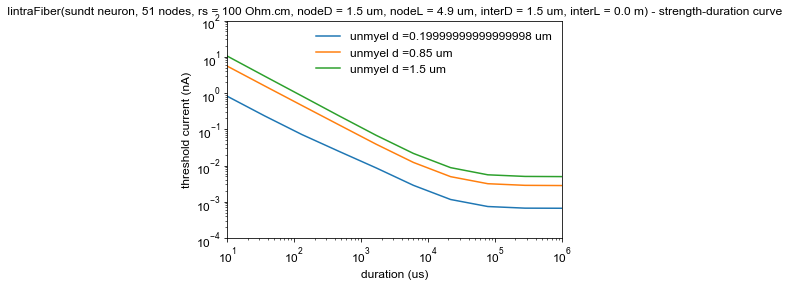

In [5]:
# Plot strength-duration curve

fig2 = strengthDurationCurve(
    fiber, durations, Ithrs_dic, 
    yfactor=1e9, scale='log',  plot_chr=False,)

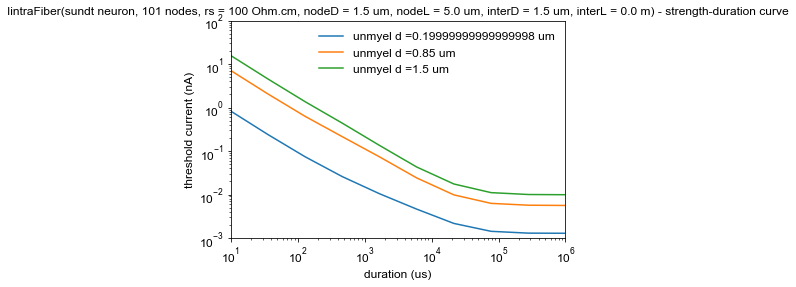

In [3]:
# Plot strength-duration curve

fig2 = strengthDurationCurve(
    fiber, durations, Ithrs_dic, 
    yfactor=1e9, scale='log',  plot_chr=False,)

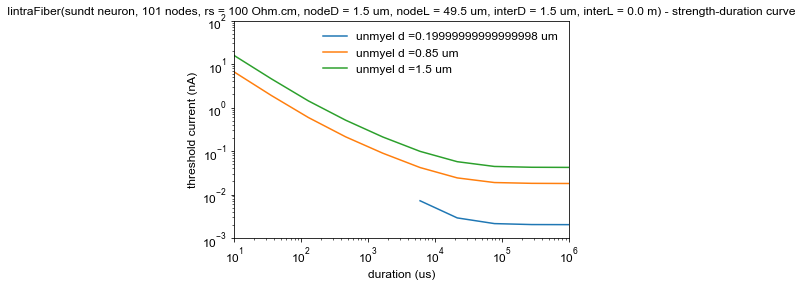

In [8]:
# Plot strength-duration curve
#for i, d in enumerate(diameters):
#    fiber = unmyelinatedFiberSundt(IintraFiber, fiberD = d)
fig2 = strengthDurationCurve(
    fiber, durations, Ithrs_dic, 
    yfactor=1e9, scale='log',  plot_chr=False,)

###  References

- Reilly, J.P., Freeman, V.T., and Larkin, W.D., *Sensory effects of transient electrical stimulation--evaluation with a neuroelectric model*, IEEE Trans Biomed Eng 32, 1001–1011, 1985.
- Sundt D, Gamper N, Jaffe DB., *Spike propagation through the dorsal root ganglia in an unmyelinated sensory neuron: a modeling study*, J Neurophysiol 114: 3140–3153, 2015.